## Curso Profesional de Scikit-Learn

### 1. Importancia de los _features_

No siempre más features implica mejores modelos. En realidad, existen técnicas para transformar los features de un dataset o reducirlos, con el objetivo de ahorrar en costo computacional y tiempo. Algunos métodos son:

- PCA
- Regularización
- Balanceo (Oversampling - Undersampling)

#### 1.1 PCA and IPCA

Ideal cuando:

- El dataset tiene un númro alto de features
- Hay alta correlación entre features
- Overfitting
- Alto costo computacional

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df_heart = pd.read_csv('../data/heart.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Separando y estadarizando el dataset:

In [3]:
df_features = df_heart.drop('target', axis=1)
df_target = df_heart['target']

In [4]:
dt_features = StandardScaler().fit_transform(df_features)

Separando el dataset:

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target,
        test_size=0.3, random_state=42)

print(X_train.shape)
print(y_train.shape)

(717, 13)
(717,)


Instanciando y aplicando PCA:

In [6]:
pca = PCA(n_components=3)
pca.fit(X_train, y_train)

ipca = IncrementalPCA(n_components=3, batch_size=10)
ipca.fit(X_train, y_train)

IncrementalPCA(batch_size=10, n_components=3)

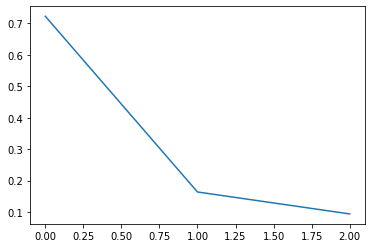

In [7]:
plt.plot(range(len(pca.explained_variance_)), pca.explained_variance_ratio_)
plt.show()

Entrenando el modelo de clasificación:

In [8]:
logistic = LogisticRegression(max_iter=100)

In [9]:
dt_train = pca.transform(X_train)
dt_test = pca.transform(X_test)
logistic.fit(dt_train, y_train)
print('SCORE PCA: ', logistic.score(dt_test, y_test))

SCORE PCA:  0.6883116883116883


In [10]:
dt_train = ipca.transform(X_train)
dt_test = ipca.transform(X_test)
logistic.fit(dt_train, y_train)
print('SCORE IPCA: ', logistic.score(dt_test, y_test))

SCORE IPCA:  0.6883116883116883


#### 1.2 KPCA

El _kernel_ nos permite proyectar en una dimensión superior nuestro conjunto de datos, que en su dimensión original no es separable pero sí en la nueva dimensión.

In [11]:
from sklearn.decomposition import KernelPCA

In [12]:
kpca = KernelPCA(n_components=4, kernel='poly')
kpca.fit(X_train)

KernelPCA(kernel='poly', n_components=4)

In [13]:
dt_train = kpca.transform(X_train)
dt_test = kpca.transform(X_test)

In [14]:
logistic.fit(dt_train, y_train)
print('SCORE KPCA: ', logistic.score(dt_test, y_test))

SCORE KPCA:  0.6818181818181818


### 1.3 Regularización

Consiste en disminuir la complejidad del modelo mediante la penalización aplicada a sus variables menos relevantes. Existen 3 tipos de regularización:

- __L1 Lasso__: eliminación de _features_ que no aportan mucho al modelo
- __L2 Ridge__: disminuir el impacto de ciertos _features_ a nuestro modelo
- __ElasticNet__: una combianción de las dos anteriores

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.metrics import mean_squared_error

In [16]:
df_felicidad = pd.read_csv('../data/felicidad.csv') 

Difiniamos los _features_ para $X$ y el objetivo $y$:

In [17]:
X = df_felicidad[['gdp', 'family', 'lifexp', 'freedom', 'corruption', 'generosity', 'dystopia']]
y = df_felicidad['score']

Dividamos los datos:

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Instanciamos los tres modelos:

In [19]:
linear_model = LinearRegression().fit(X_train, y_train)
y_linear_pred = linear_model.predict(X_test)

lasso_model = Lasso(alpha=0.02).fit(X_train, y_train)
y_lasso_pred = lasso_model.predict(X_test)

ridge_model = Ridge(alpha=1).fit(X_train, y_train)
y_ridge_pred = ridge_model.predict(X_test)

Comparando las pérdidas de cada modelo:

In [20]:
linear_loss = mean_squared_error(y_test, y_linear_pred)
print('LINEAR LOSS: ', linear_loss)

linear_lasso = mean_squared_error(y_test, y_lasso_pred)
print('LASSO LOSS: ', linear_lasso)

ridge_loss = mean_squared_error(y_test, y_ridge_pred)
print('RIDGE LOSS: ', ridge_loss)

LINEAR LOSS:  6.90088239406908e-08
LASSO LOSS:  0.04569751791090943
RIDGE LOSS:  0.005733589667803603


Coeficientes:

In [21]:
print('Coef LASSO: ', lasso_model.coef_)
print('Coef RIDGE: ', ridge_model.coef_)

Coef LASSO:  [1.28541426 0.80386089 0.59488584 0.81230773 0.         0.19186833
 0.89750763]
Coef RIDGE:  [1.08075389 0.93480158 0.88350067 0.89920142 0.62788673 0.75873987
 0.95981994]


Podemos ver que efectivamente el modelo L1 ha llevado uno de los coeficientes (weights) a valor 0, no así la regularización L2.

Por otro lado, los valores de los coeficientes nos indican los _features_ que están teniendo mayor impacto en la predicción del _target_.

Para ElasticNet tenderemos un coeficiente adicional $\alpha$, el cual puede tomar valores entre 0 y 1. Si toma el valor 0 se comporta como L1 y si toma el valor de 1 se comporta como L2 más todos los valores intermedios.

### 1.4 Regresiones Robustas

#### 1.4.1 Valores atípicos

Son los datos que no se comportan de acuerdo con el patron general del resto de los datos. Pueden ser producto de error en la captura del dato, en la carga del dato o muestran un fenómeno que no hemos descubierto en los datos.

Pueden sesgar nuestros models de ML.

Identificación

- __Z-score__: mide desviaciones en términos de desviación estándar
- __DBSCAN__: técnica de clustering
- __IQR__: rango intercuartil y boxplot

#### 1.4.2 Regresiones robustas

Podemos no solo lidiar con valores atípicos durante el preprocesamiento. Scikit-Learn nos ofrece herramientas para tratar con ellos durante la fase de entrenamiento.

Dos ejemplos son:

- __RANSAC__: se busca la muestra aleatoria de nuestros datos que más datos "buenos" tenga
- __Huber Regressor__: no ignora los outliers, disminuye su influencia. 

In [22]:
from sklearn.linear_model import RANSACRegressor, HuberRegressor
from sklearn.svm import SVR

In [23]:
dataset = pd.read_csv('../data/felicidad_corrupt.csv')
dataset.head()

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


Splitting the data:

In [24]:
X = dataset.drop(['country', 'score'], axis=1)
y = dataset['score']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Guardaremos nuestros estimadores:

In [26]:
estimators = {
    'SVR': SVR(gamma='auto', C=1.0, epsilon=0.1),
    'RANSAC': RANSACRegressor(),
    'HUBER': HuberRegressor(epsilon=1.35)
}

In [27]:
for name, estimator in estimators.items():
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    error = mean_squared_error(y_test, y_pred)

    print('=' * 64)
    print(name)
    print(f'MSE: {error}')

SVR
MSE: 0.07455771301888525
RANSAC
MSE: 1.275637282559889e-19
HUBER
MSE: 8.44486571216315e-07


/home/andres/anaconda3/envs/ml-zoomcamp/lib/python3.8/site-packages/sklearn/linear_model/_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### 1.5 Métodos de ensambel aplicados a clasificación

_Ensemble_ trata de la combinación de diferentes modelos de ML con configuraciones diferentes y aplicar un método para llegar a un consenso como resultado final. Dos de estos métodos son:

- __Bagging__: _Bootstrap Aggregation_. usar cada modelo en paralelo, se entrena con un subconjunto tipo bootstrap, llegar a una respuesta y al final se obtiene un consenso.  
 
- __Boosting__: proceso iterativo en el que un modelo obtiene el resultado, se calcual su error, se pasa a un siguiente modelo el cual intentará corregir una proporción del error del primer modelo y arroja un nuevo resultado.

#### 1.5.1 Modelado de ensamble

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import accuracy_score

Splitting the data:

In [29]:
df_heart = pd.read_csv('../data/heart.csv')

X = df_heart.drop('target', axis=1)
y = df_heart['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=77)

Training the models:

In [30]:
knn_class = KNeighborsClassifier()
knn_class.fit(X_train, y_train)
knn_pred = knn_class.predict(X_test)

bag_class = BaggingClassifier(base_estimator=knn_class, n_estimators=50)
bag_class.fit(X_train, y_train)
bag_pred = bag_class.predict(X_test)

Printing results:

In [31]:
print(f'KNN acurracy: {accuracy_score(y_test, knn_pred)}')
print(f'Bagging acurracy: {accuracy_score(y_test, bag_pred)}')

KNN acurracy: 0.7270194986072424
Bagging acurracy: 0.7465181058495822


#### 1.5.2 Modelo Boosting

In [32]:
from sklearn.ensemble import GradientBoostingClassifier

We are going to be using the same data used in bagging, let's train the boosting model:

In [33]:
boost = GradientBoostingClassifier(n_estimators=50)
boost.fit(X_train, y_train)
boost_pred = boost.predict(X_test)

In [34]:
print(f'Boost acurracy: {accuracy_score(y_test, boost_pred)}')

Boost acurracy: 0.9080779944289693


### 1.6 Clustering

Esta es una estrategia no supervisada, para tratar de encontrar patrones en nuestros datos que no son visibles a priori, encontrar etiquetas para clasificar un dataset o bien para identificar _outliers_.

- Si sabemos el valor _k_ : k-means, Spectral Clustering
- Si desconocemos el valor _k_ : Meanshift, Clustering Jerárquico, DBScan

#### 1.6.1 Implementando K-Means (MiniBatchKMeans)

In [35]:
from sklearn.cluster import MiniBatchKMeans

Esta librería consume muchos menos recursos (si estamos limitados) con resultados bastante similares a un K-Means.

In [36]:
df = pd.read_csv('../data/candy.csv')
X = df.drop('competitorname', axis=1)

In [37]:
kmeans = MiniBatchKMeans(n_clusters=4, batch_size=8)
kmeans.fit(X)

MiniBatchKMeans(batch_size=8, n_clusters=4)

In [38]:
cluster_centers = kmeans.cluster_centers_
labels = kmeans.predict(X)

In [39]:
len(cluster_centers)

4

In [40]:
df['categorie'] = labels
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,categorie
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,0
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,3
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,1
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,2


#### 1.6.2 Implementando Mean-Shift

In [41]:
from sklearn.cluster import MeanShift

In [42]:
meanshift = MeanShift()
meanshift.fit(X)

MeanShift()

In [43]:
cluster_centers = kmeans.cluster_centers_
labels = kmeans.labels_

In [44]:
print(f'Number of groups: {len(cluster_centers)}')

Number of groups: 4


In [45]:
df['categorie'] = labels
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,categorie
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725,0
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936,0
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086,3
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505,1
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465,2


### 1.7 Optimización paramétrica

In [46]:
import numpy as np

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [47]:
df = pd.read_csv('../data/felicidad.csv')

X = df.drop(['country', 'score'], axis=1)
y = df['score']

In [48]:
model = DecisionTreeRegressor()
score = cross_val_score(model, X, y, cv=3, scoring='neg_mean_squared_error')

In [49]:
np.abs(np.mean(score))

0.5630264630431355

Ahora podemos usar CV para la optimización de nuestros modelos. Hay 3 métodos para hacerlo:

- Optimización manual
- Uso de una grilla de parámetros (GridSearchCV)
- Por búsqueda aleatoria (RandomizedSearchCV)

Implementaremos un `RandomizedSearchCV()`

### 1.8 Salida a producción